In [45]:
import kagglehub
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

#FDataset fuente
data = kagglehub.dataset_download("jahnavipaliwal/customer-feedback-and-satisfaction")
file_path = os.path.join(data, "customer_feedback_satisfaction.csv")

#Convertir a DataFrame
df = pd.read_csv(file_path)

#Ver detalle de la data
print(df.describe())

#Revisar si hay datos null
print(df.isnull().sum())

#Revisar si hay datos duplicados
print("\nCantidad de datos duplicados: ", df.duplicated().sum())

#Eliminar columnas innecesarias
df.drop(columns=['CustomerID'], inplace = True)

#Convertir genero a variables numericas
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

#Convertir Feedback a variables numericas
df['FeedbackScore'] = df['FeedbackScore'].map({'Low': 0, 'Medium': 1, 'High' : 2})

#Convertir Feedback a variables numericas
df['LoyaltyLevel'] = df['LoyaltyLevel'].map({'Bronze': 0, 'Silver': 1, 'Gold' : 2})

#Convertir pais a variable numerica
df['CountryS'] = df['Country'].map({'UK': 0, 'USA': 1, 'France' : 2, 'Germany' : 3, 'Canada': 4})

#Escalar sueldo debido a la magnitud de los numeros
scaler = MinMaxScaler()
df['IncomeS'] = scaler.fit_transform(df[['Income']])

#Escalar edad debido a la magnitud de los numeros
scaler = MinMaxScaler()
df['AgeS'] = scaler.fit_transform(df[['Age']])

#Ver datos
print(df.head())


         CustomerID           Age         Income  ProductQuality  \
count  38444.000000  38444.000000   38444.000000    38444.000000   
mean   19222.500000     43.496853   75076.619238        5.494746   
std    11097.971211     14.972748   25975.752966        2.873192   
min        1.000000     18.000000   30001.000000        1.000000   
25%     9611.750000     31.000000   52624.500000        3.000000   
50%    19222.500000     43.000000   75236.000000        5.000000   
75%    28833.250000     56.000000   97606.750000        8.000000   
max    38444.000000     69.000000  119999.000000       10.000000   

       ServiceQuality  PurchaseFrequency  SatisfactionScore  
count    38444.000000       38444.000000       38444.000000  
mean         5.492769          10.453881          85.276409  
std          2.875812           5.765621          16.898577  
min          1.000000           1.000000           4.280000  
25%          3.000000           5.000000          74.470000  
50%          5.

Text(0.5, 1.0, 'Matriz de Correlación')

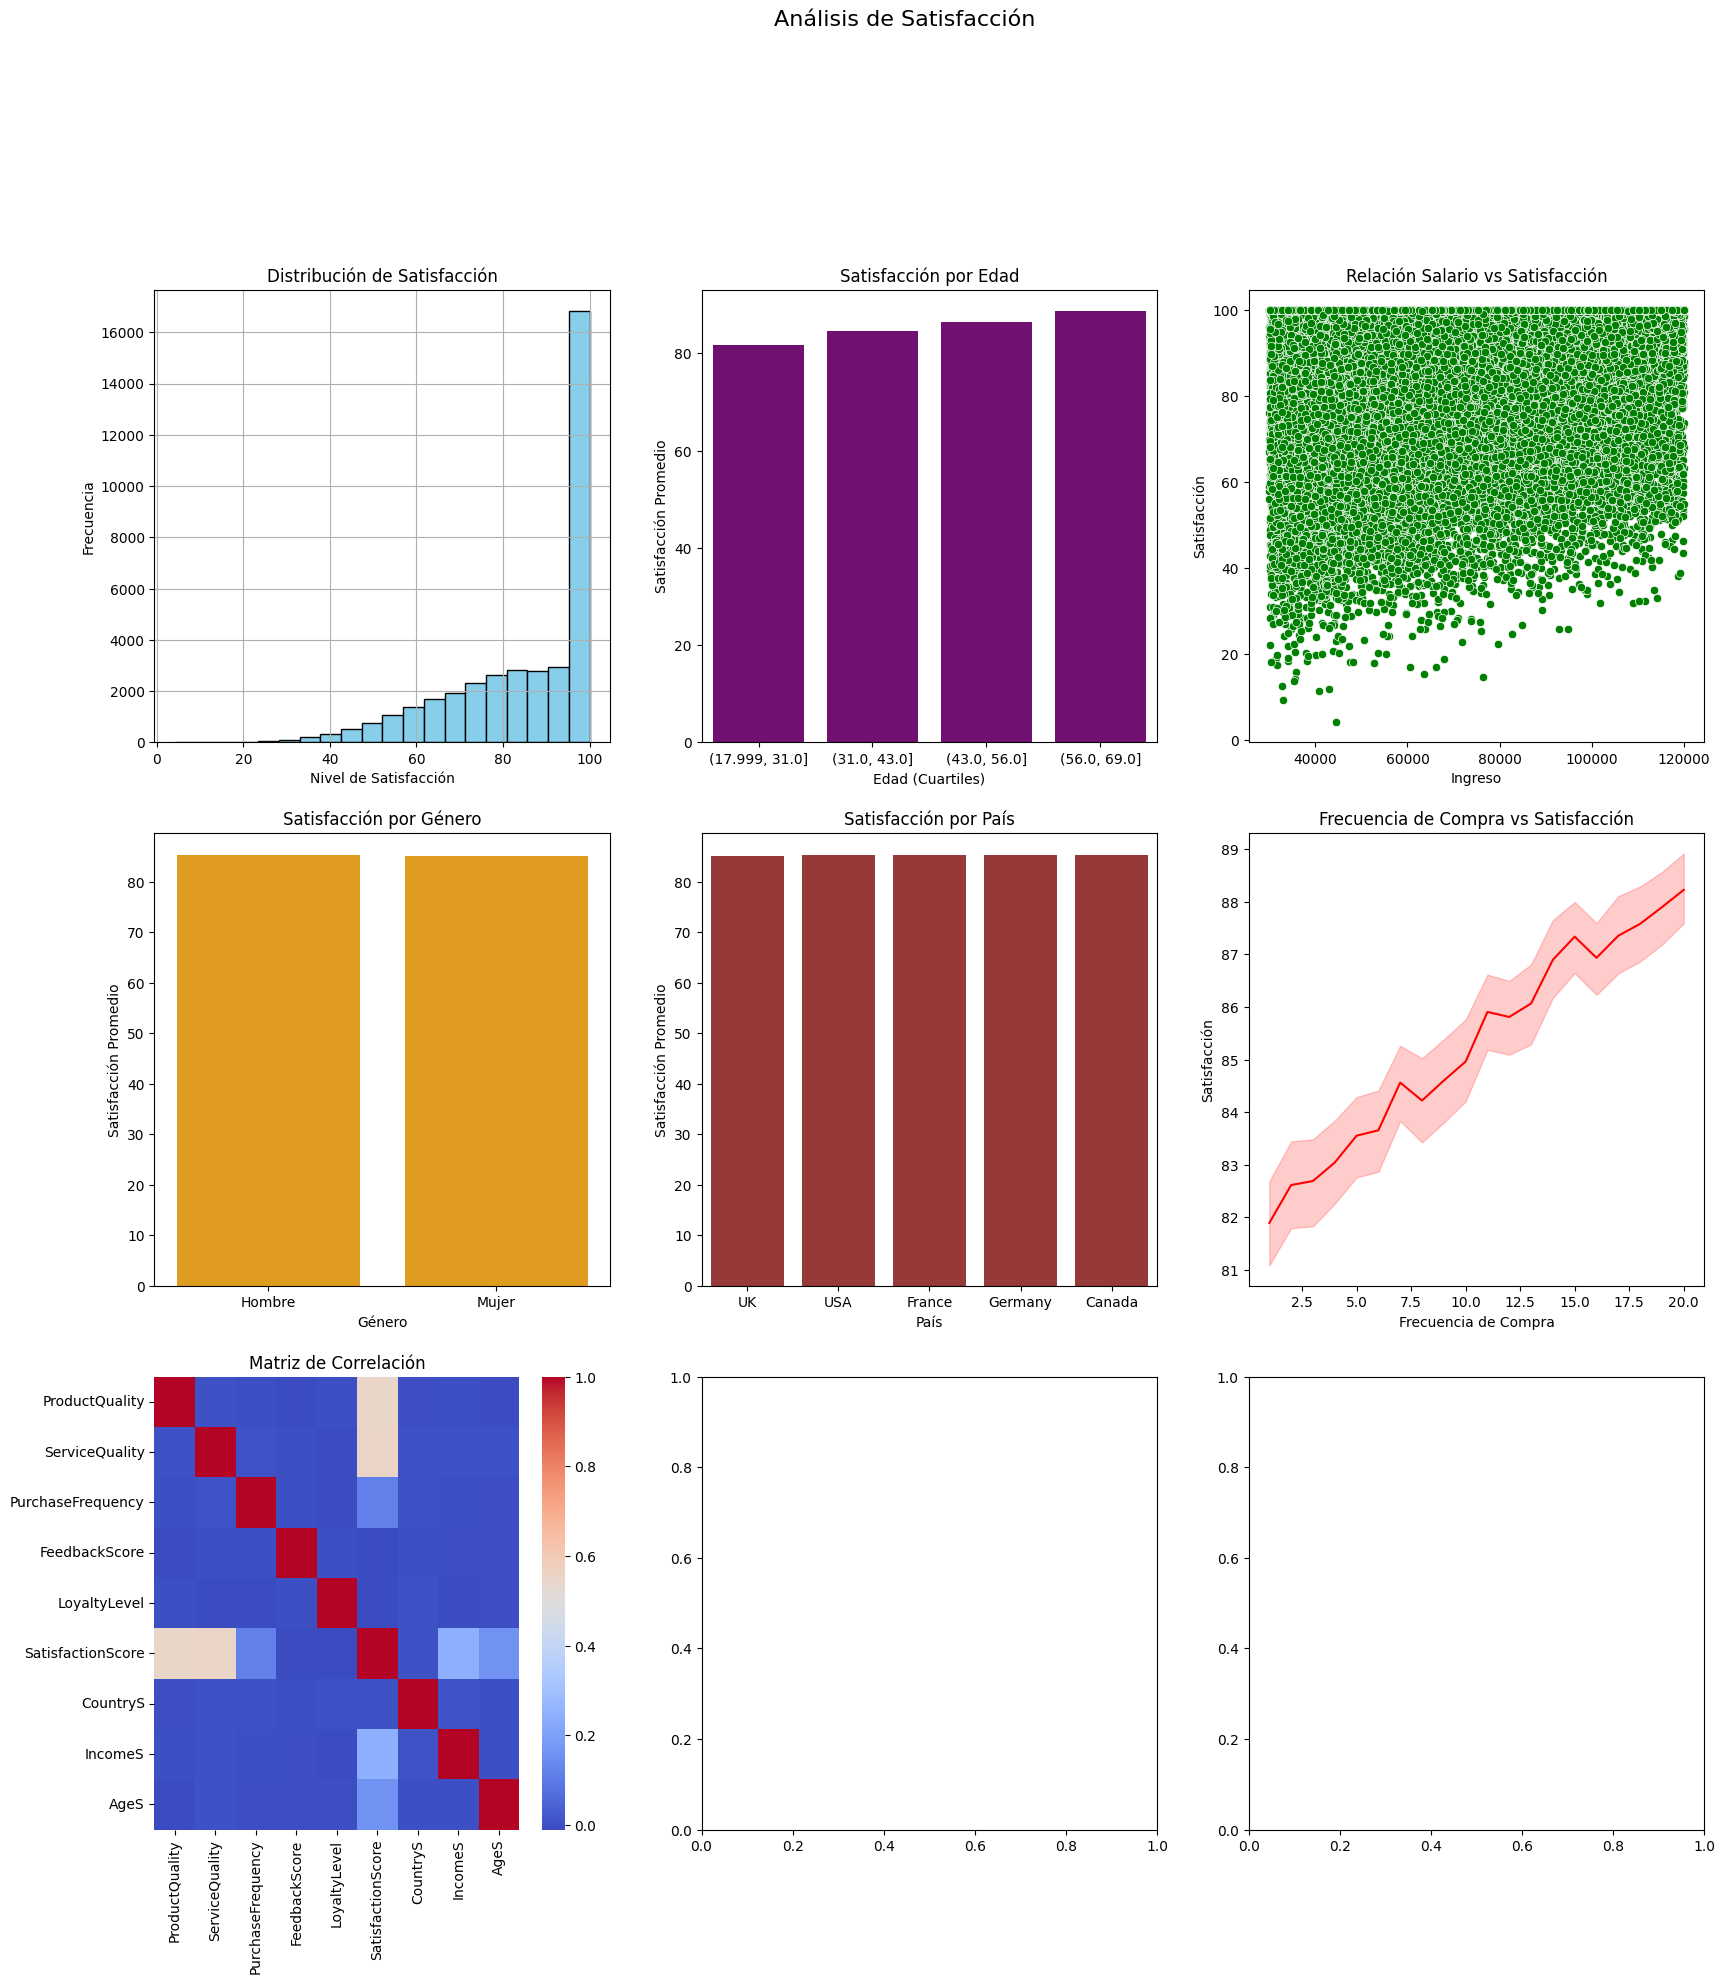

In [48]:
#ANALISIS

fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Análisis de Satisfacción', fontsize=16, y=1.02)

# 1. Distribución de los valores de satisfacción
df['SatisfactionScore'].hist(bins=20, ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribución de Satisfacción')
axes[0, 0].set_xlabel('Nivel de Satisfacción')
axes[0, 0].set_ylabel('Frecuencia')

# 2. Satisfacción por edad
df['AgeQ'] = pd.qcut(df['Age'], 4)
sns.barplot(x='AgeQ', y='SatisfactionScore', errorbar=None, data=df, ax=axes[0, 1], color ='purple')
axes[0, 1].set_title('Satisfacción por Edad')
axes[0, 1].set_xlabel('Edad (Cuartiles)')
axes[0, 1].set_ylabel('Satisfacción Promedio')

# 3. Relación salario vs satisfacción
sns.scatterplot(data=df, x='Income', y='SatisfactionScore', ax=axes[0, 2], color='green')
axes[0, 2].set_title('Relación Salario vs Satisfacción')
axes[0, 2].set_xlabel('Ingreso')
axes[0, 2].set_ylabel('Satisfacción')

# 4. Satisfacción por Género
sns.barplot(x='Gender', y='SatisfactionScore', errorbar=None, data=df, ax=axes[1,0], color = 'orange')
axes[1, 0].set_title('Satisfacción por Género')
axes[1, 0].set_xlabel('Género')
axes[1, 0].set_ylabel('Satisfacción Promedio')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['Hombre', 'Mujer'])

# 5. Satisfacción por País
sns.barplot(x='Country', y='SatisfactionScore', errorbar=None, data=df, ax=axes[1, 1], color='brown')
axes[1, 1].set_title('Satisfacción por País')
axes[1, 1].set_xlabel('País')
axes[1, 1].set_ylabel('Satisfacción Promedio')

# 6. Relación de frecuencia de compra vs satisfacción
sns.lineplot(data=df, x='PurchaseFrequency', y='SatisfactionScore', ax=axes[1, 2], color='red')
axes[1, 2].set_title('Frecuencia de Compra vs Satisfacción')
axes[1, 2].set_xlabel('Frecuencia de Compra')
axes[1, 2].set_ylabel('Satisfacción')

# 7. Matriz de correlación
df_numeric = df.drop(columns=['Age', 'Income', 'Country', 'Gender','AgeQ'])  # Eliminar columnas no numéricas
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', ax=axes[2, 0])
axes[2, 0].set_title('Matriz de Correlación')